In [98]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image 
from sklearn.datasets import load_iris  
import matplotlib.pyplot as plt  
from sklearn import tree

In [99]:
#loading data
df= pd.read_csv('AER_credit_card_data.csv')
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


### Data preparation and Feature selection

In [100]:
#convert non-numerical data into numerical data
d= {'yes': 1, 'no': 0}
df['card']= df['card'].map(d)

d= {'yes': 1, 'no': 0}
df['owner']= df['owner'].map(d)

d= {'yes': 1, 'no': 0}
df['selfemp']= df['selfemp'].map(d)

#check data type
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [101]:
#split dataset in features and target variable => Feature selection
feature= ['reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp', 'majorcards', 'active']
X= df[feature] #features
y= df['card'] #target variable

In [102]:
#split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Build model

In [103]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluate the model

In [104]:
#Evaluate the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9621212121212122


### Visualize the model

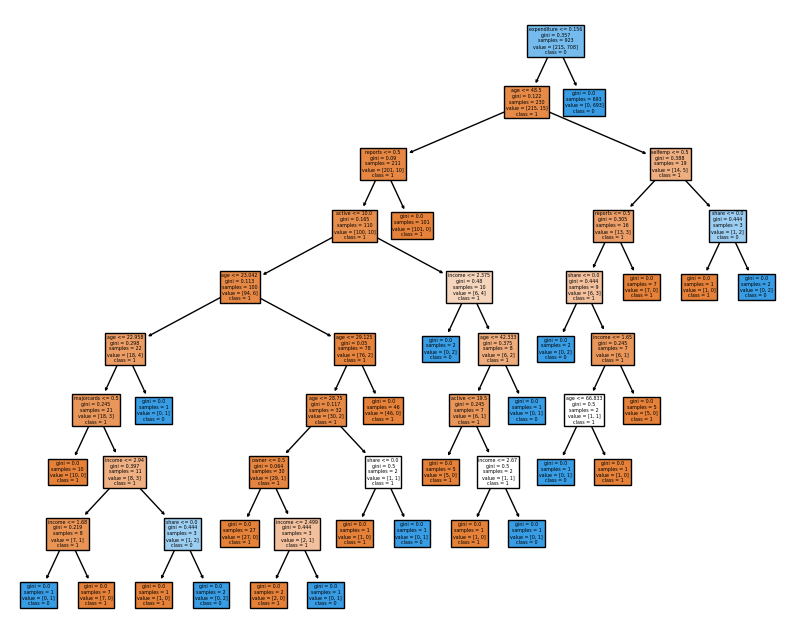

In [110]:
#visualize the result 
plt.figure(figsize=(10, 8))  
tree.plot_tree(clf, feature_names=feature, class_names=['1', '0'], filled=True)  

#save the plot as a image
plt.savefig('decision_tree_plot.png', format='png', dpi=600)
plt.show()